In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import requests
import os
import datetime
import re
import warnings
import seaborn as sns
import zipfile
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
# read csv as a Pandas DataFrame
twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Using requests library to download tsv file hosted on udacity server programmatically

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = 'image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions  = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'wLIikXN2Mm6L4k9hUGpKw0DMa'
consumer_secret = '32j7zmDP0Ni9FykX1X28tOHjz817coLgRr07wXt1g2aWMhaHTM'
access_token = '1099593840-doTQC5wIWc8mGii7g1OoObaT41Xq2EbVsCUOaPT'
access_secret = 'tn03BVb1hJUwtu7MbRZw8QkY4Dq5X4WH6MHQsTQrzryL2'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [5]:
exp_tweet = api.get_status(twitter_enhanced.tweet_id[1000],tweet_mode = 'extended')
content = exp_tweet._json
content

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [6]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_enhanced.tweet_id.values
len(tweet_ids)


2356

In [7]:

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [8]:
# Creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

In [9]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
tweet_json2 = pd.DataFrame(df_list)
tweet_json2.head()

,favorite_count,retweet_count,tweet_id
0,35202,7428,892420643555336193
1,30471,5524,892177421306343426
2,22918,3647,891815181378084864
3,38497,7605,891689557279858688
4,36760,8188,891327558926688256


## Assessing Data: Quality and Tidiness Issues



# Visual assessment

In [10]:
twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
tweet_json2

,favorite_count,retweet_count,tweet_id
0,35202,7428,892420643555336193
1,30471,5524,892177421306343426
2,22918,3647,891815181378084864
3,38497,7605,891689557279858688
4,36760,8188,891327558926688256
5,18531,2744,891087950875897856
6,10779,1779,890971913173991426
7,59296,16612,890729181411237888
8,25514,3795,890609185150312448
9,29103,6433,890240255349198849


# progrmmatic assessment

In [13]:
# Display a basic summary of the DataFrame using .info
twitter_enhanced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
twitter_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
twitter_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
an              7
Buddy           7
Daisy           7
Toby            7
Stanley         6
Dave            6
Oscar           6
Jack            6
Koda            6
Leo             6
Rusty           6
Scout           6
Milo            6
Bella           6
Jax             6
Sunny           5
             ... 
Tove            1
Steve           1
Furzey          1
Monkey          1
Tom             1
Pavlov          1
Edmund          1
Opie            1
Skittles        1
Fletcher        1
Orion           1
Blu             1
JD              1
Amy             1
Howie           1
Erik            1
Pippin          1
Sparky          1
Jeffrie         1
Georgie         1
Tino            1
Crumpet         1
officially      1
Skittle         1
Tilly     

In [17]:
# check whether rating_numerator is always filled
twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_enhanced.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:

# Checking for duplicated rows across all columns.
sum(twitter_enhanced.duplicated())

0

In [21]:
twitter_enhanced.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

# Quality:

1.The timestamp column has dates in string form(object).

2.there are unwanted columns (retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id ) 


3.archive: column "expanded URLs" has missing values, duplicates and unnecessary links

4.not all dog names are filled

6.data type rating_numerator to float
    rating_denominator to float

7.day,month,year are in one column 

### how this is a quality issue ? they are 3 variable in one column it should be tidess i correct it because of the review but i didn,t understand it 

# tidiness:

1.the columns doggo, floofer, pupper and puppo could be collapsed into a  column




In [22]:
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

# Quality:
8.Nondescriptive column headers ("p1" and "p1_conf")

9 . p1, p2, p3: dog breed names are not all in lowercase

# tidiness:

2.The column "jpg_url" will be removed since url data is already contained in the twitter enhanced data

3.Need to combine dog stages into a single column.


In [27]:
tweet_json2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [28]:
tweet_json2.head(5)

,favorite_count,retweet_count,tweet_id
0,35202,7428,892420643555336193
1,30471,5524,892177421306343426
2,22918,3647,891815181378084864
3,38497,7605,891689557279858688
4,36760,8188,891327558926688256


In [29]:
tweet_json2.tail()

,favorite_count,retweet_count,tweet_id
2326,94,39,666049248165822465
2327,262,123,666044226329800704
2328,107,39,666033412701032449
2329,118,41,666029285002620928
2330,2341,445,666020888022790149


In [30]:
tweet_json2.describe()

,favorite_count,retweet_count,tweet_id
count,2331.000000,2331.000000,2.331000e+03
mean,7354.175461,2609.462462,7.419079e+17
std,11421.627680,4414.855481,6.823170e+16
min,0.000000,1.000000,6.660209e+17
25%,1277.500000,529.000000,6.782670e+17
50%,3193.000000,1219.000000,7.182469e+17
75%,9000.500000,3029.500000,7.986692e+17
max,151577.000000,74975.000000,8.924206e+17


In [31]:
tweet_json2.isnull().sum()


favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

## Quality:

10.non-numeric values for the "tweet_id" inputs which will need to be removed after merging data


11.datatype tweet_id to object


## Tidiness:

4.Need to merge all the 3 datasets into a master dataset. 


# CLEANING

# copy dataframes for cleaning

In [32]:
twitter_enhanced_clean = twitter_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json2_clean = tweet_json2.copy()

# define
merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process.

# code

In [33]:

twitter_enhanced_clean = (twitter_enhanced_clean.merge(tweet_json2_clean))
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 19 columns):
tweet_id                      2331 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2331 non-null object
source                        2331 non-null object
text                          2331 non-null object
retweeted_status_id           163 non-null float64
retweeted_status_user_id      163 non-null float64
retweeted_status_timestamp    163 non-null object
expanded_urls                 2272 non-null object
rating_numerator              2331 non-null int64
rating_denominator            2331 non-null int64
name                          2331 non-null object
doggo                         2331 non-null object
floofer                       2331 non-null object
pupper                        2331 non-null object
puppo                         2331 non-null object
favorite_count                23

In [34]:
twitter_enhanced_clean = (twitter_enhanced_clean.merge(image_predictions_clean))
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorite_count                2059 

# Define
p1, p2, p3: dog breed names are not all in lowercase
Turn them into lower case



# code

In [35]:

twitter_enhanced_clean['p1'] = twitter_enhanced_clean['p1'].str.lower()
twitter_enhanced_clean['p2'] = twitter_enhanced_clean['p2'].str.lower()
twitter_enhanced_clean['p3'] = twitter_enhanced_clean['p3'].str.lower()


# Test

In [36]:

twitter_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
63,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,...,2,italian_greyhound,0.734684,True,whippet,0.150487,True,ibizan_hound,0.039725,True
1098,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705898680...,...,1,collie,0.808276,True,border_collie,0.059437,True,groenendael,0.026720,True
142,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,...,1,golden_retriever,0.863874,True,labrador_retriever,0.015920,True,doormat,0.010615,False
571,782969140009107456,NaN,NaN,2016-10-03 15:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cali. She arrived preassembled. Conven...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782969140...,...,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,labrador_retriever,0.110592,True
1237,693109034023534592,NaN,NaN,2016-01-29 16:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Thank you friend that was a swell petting"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693109034...,...,1,cocker_spaniel,0.740013,True,welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True


# Define
The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

# Code


In [37]:

new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

twitter_enhanced_clean.rename(columns= new_col_names, inplace=True)

# Test


In [38]:
list(twitter_enhanced_clean.columns)


['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']


# Define
Finding non-numeric values for "tweet_id"



# Code

In [39]:

nn_index_list = []

for i in range(0, len(tweet_json2_clean.tweet_id)):
    if type(tweet_json2_clean.tweet_id[i]) != int:
        nn_index_list.append(i)

In [40]:
for i in nn_index_list:
    tweet_json2_clean.drop(tweet_json2_clean[tweet_json2_clean.index == i].index, inplace=True)

# Test

In [41]:

tweet_json2_clean.shape

(0, 3)

In [42]:
# Reset index
tweet_json2_clean = tweet_json2_clean.reset_index()
del tweet_json2_clean['index']

# Define
Delete retweets by filtering the NaN of retweeted_status_user_id

# Code

In [43]:
twitter_enhanced_clean = twitter_enhanced_clean[pd.isnull(twitter_enhanced_clean['retweeted_status_user_id'])]


# TEST


In [44]:
print(sum(twitter_enhanced_clean.retweeted_status_user_id.value_counts()))

0


# define tidiness
remove unwanted columns (retweeted_status_timestamp, retweeted_status_user_id, retweeted_status_id,... ) 

# Code


In [45]:

drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id','retweeted_status_timestamp']


twitter_enhanced_clean.drop(drop_cols, inplace=True, axis=1)

In [46]:
# TEST


In [47]:
list(twitter_enhanced_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

# define
Remove those missing values in expanded_urls column by .dropna

# Code


In [48]:
twitter_enhanced_clean.dropna(subset=['expanded_urls'], inplace=True)

# Test


In [49]:
twitter_enhanced_clean.expanded_urls.isnull().sum()

0

# define:
Delete tweets with no pictures

# Code


In [50]:
twitter_enhanced_clean = twitter_enhanced_clean.drop_duplicates(['jpg_url'])

# Test


In [51]:
len(twitter_enhanced_clean[twitter_enhanced_clean.jpg_url.duplicated()])

0

# Define
Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column.


# CODE:


In [52]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in twitter_enhanced_clean.columns.tolist() if x not in melt_columns]

# Melt the the columns into values
twitter_enhanced_clean = pd.melt(twitter_enhanced_clean, id_vars = stay_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'dogs_stage')

# Delete column 'stages'
twitter_enhanced_clean = twitter_enhanced_clean.drop('stages', 1)

# Test

In [53]:
twitter_enhanced_clean.info()
twitter_enhanced_clean.dogs_stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 22 columns):
tweet_id                 7948 non-null int64
timestamp                7948 non-null object
source                   7948 non-null object
text                     7948 non-null object
expanded_urls            7948 non-null object
rating_numerator         7948 non-null int64
rating_denominator       7948 non-null int64
name                     7948 non-null object
favorite_count           7948 non-null int64
retweet_count            7948 non-null int64
jpg_url                  7948 non-null object
img_num                  7948 non-null int64
dog_breed_prediction     7948 non-null object
prediction_confidence    7948 non-null float64
p1_dog                   7948 non-null bool
p2                       7948 non-null object
p2_conf                  7948 non-null float64
p2_dog                   7948 non-null bool
p3                       7948 non-null object
p3_conf                  79

None       7632
pupper      212
doggo        73
puppo        23
floofer       8
Name: dogs_stage, dtype: int64

# Define
correct all datatypes by changing the datatypes of the columns.

# code

In [54]:
twitter_enhanced_clean['tweet_id'] = twitter_enhanced_clean['tweet_id'].astype(str)
twitter_enhanced_clean['timestamp'] = pd.to_datetime(twitter_enhanced_clean.timestamp)
twitter_enhanced_clean['dogs_stage'] = twitter_enhanced_clean['dogs_stage'].astype('category')
twitter_enhanced_clean['rating_numerator'] = twitter_enhanced_clean['rating_numerator'].astype(float)
twitter_enhanced_clean['rating_denominator'] = twitter_enhanced_clean['rating_denominator'].astype(float)


# Test

In [55]:
#check the data types of each column
twitter_enhanced_clean.dtypes

tweet_id                         object
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                float64
rating_denominator              float64
name                             object
favorite_count                    int64
retweet_count                     int64
jpg_url                          object
img_num                           int64
dog_breed_prediction             object
prediction_confidence           float64
p1_dog                             bool
p2                               object
p2_conf                         float64
p2_dog                             bool
p3                               object
p3_conf                         float64
p3_dog                             bool
dogs_stage                     category
dtype: object

# Define
Clean data by dropping duplicates row and not meaningful columns.


# code

In [56]:
# Delete duplicated tweet_id
twitter_enhanced_clean = twitter_enhanced_clean.drop_duplicates()


#Delete dog_stage duplicates
twitter_enhanced_clean = twitter_enhanced_clean.sort_values('dogs_stage').drop_duplicates('tweet_id', keep = 'last')

# Test

In [57]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 6768
Data columns (total 22 columns):
tweet_id                 1987 non-null object
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null float64
rating_denominator       1987 non-null float64
name                     1987 non-null object
favorite_count           1987 non-null int64
retweet_count            1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
dog_breed_prediction     1987 non-null object
prediction_confidence    1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf       

# Define
Separate timestamp into day - month - year (3 columns)


# Code

In [58]:
#extract year, month and day to new columns

twitter_enhanced_clean['year'] =  pd.DatetimeIndex(twitter_enhanced_clean['timestamp']).year
twitter_enhanced_clean['month'] = pd.DatetimeIndex(twitter_enhanced_clean['timestamp']).month
twitter_enhanced_clean['day'] = pd.DatetimeIndex(twitter_enhanced_clean['timestamp']).day

# Test

In [59]:
list(twitter_enhanced_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dogs_stage',
 'year',
 'month',
 'day']

# define
drop timestamp column

# Code

In [61]:
twitter_enhanced_clean = twitter_enhanced_clean.drop('timestamp', 1)


# Test

In [62]:
list(twitter_enhanced_clean)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dogs_stage',
 'year',
 'month',
 'day']

# Define
name: this column has some missing values and some of the names are not real dog names but articles or adjectives.


# Code

In [63]:
#Replace those not-real-dog-names with None

not_dog_names = twitter_enhanced_clean.loc[(twitter_enhanced_clean.name.str.islower())].name.value_counts().index.tolist()
not_dog_names.append('None')
not_dog_names

for name in not_dog_names:
    twitter_enhanced_clean.loc[twitter_enhanced_clean.name == name, 'name'] = None
 

# Test

In [64]:
twitter_enhanced_clean.name.value_counts() 

Charlie         10
Cooper          10
Oliver          10
Lucy             9
Tucker           9
Penny            9
Winston          8
Sadie            8
Daisy            7
Toby             7
Lola             7
Jax              6
Stanley          6
Koda             6
Bo               6
Bella            6
Milo             5
Oscar            5
Scout            5
Louis            5
Bailey           5
Buddy            5
Chester          5
Dave             5
Rusty            5
Leo              5
Chip             4
Gary             4
Finn             4
Brody            4
                ..
Jiminus          1
Tuco             1
Anakin           1
Finnegus         1
Rocco            1
Apollo           1
Acro             1
Chuck            1
Jimbo            1
Odin             1
Naphaniel        1
Bilbo            1
Coopson          1
Ozzie            1
Billl            1
Laika            1
Pupcasso         1
Ulysses          1
Gòrdón           1
Alexanderson     1
Ambrose          1
Sage        


# save master data frame

In [65]:

twitter_enhanced_clean.to_csv('twitter_archive_analyze.csv', index=False)

# Analyze&Visualize

In [66]:
df = pd.read_csv('twitter_archive_analyze.csv')

In [67]:
#which kind of source are people using the most?

twitter_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1949
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

 most people using Twitter for iPhone

In [68]:
#Most popular names

twitter_enhanced_clean.name.value_counts().head(5)


Charlie    10
Cooper     10
Oliver     10
Lucy        9
Tucker      9
Name: name, dtype: int64

Most popular names
Charlie    10
Cooper     10
Oliver     10

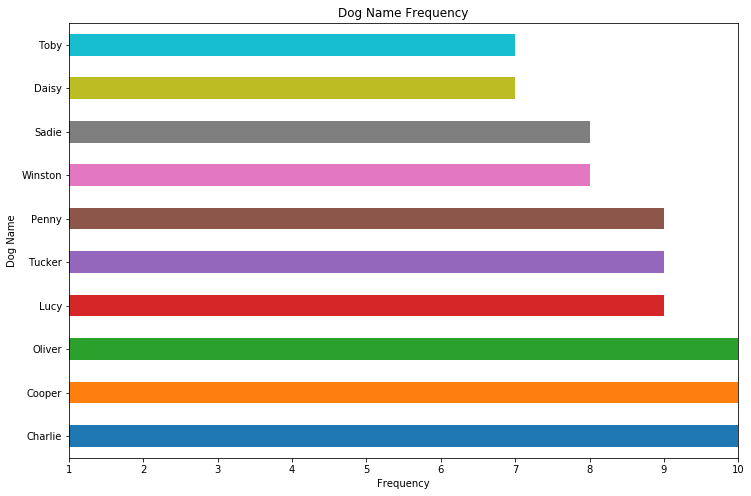

In [69]:
# Plot the top 10 Dog names by frequency
plt.figure(figsize=(12, 8))
dog_names = twitter_enhanced_clean.name.value_counts().nlargest(10).plot(kind = 'barh');
dog_names.set_title('Dog Name Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 10);

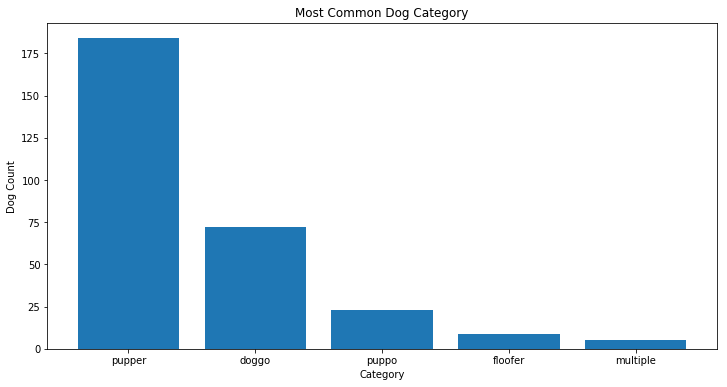

In [70]:

dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [184, 72, 23, 9, 5]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

Most popular dog type is pupper

In [71]:
#calculate rating ratio
twitter_enhanced_clean['rating_ratio'] = twitter_enhanced_clean['rating_numerator']/twitter_enhanced_clean['rating_denominator']

C:\Users\Salma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


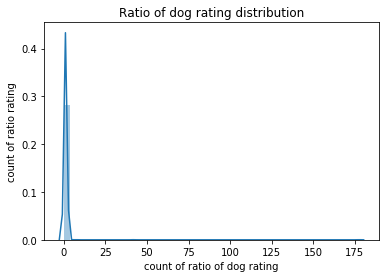

In [72]:
#discover the ratio of dog rating distribution


#Here after we calculated the ratio of dog rating from(rating numerator /rating denominator)rate, we can see that the chart takes normally distribution of dogs rating.

sns.distplot(twitter_enhanced_clean.rating_ratio).set_title('Ratio of dog rating distribution');
plt.xlabel('count of ratio of dog rating')
plt.ylabel('count of ratio rating')
plt.show();

In [73]:
twitter_enhanced_clean.dog_breed_prediction.value_counts()


golden_retriever             139
labrador_retriever            93
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       39
pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
french_bulldog                25
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
siberian_husky                20
german_shepherd               20
eskimo_dog                    18
maltese_dog                   18
staffordshire_bullterrier     18
shetland_sheepdog             18
teddy                         18
shih-tzu                      17
cardigan                      17
rottweiler                    17
beagle                        17
lakeland_terrier              16
kuvasz                        16
italian_greyhound             16
web_site                      15
          

The most popular dog is a Golden Retriever


In [74]:
twitter_enhanced_clean.favorite_count.describe()

count      1987.000000
mean       8047.707096
std       11853.754245
min          69.000000
25%        1724.000000
50%        3634.000000
75%        9989.000000
max      151577.000000
Name: favorite_count, dtype: float64

The median and mean favorite count is  3634 and  8047 respectively
